# Hyper-parametre tunning

# Model paramater
* Are the configuration variable that are internal to the model and the model learns them on its own
*  y = mx+c
    * were : m and c are model parametres

# Hyper
* This are the parametres that the user defines to control the learning process
* But we need to change (tune) them as per our convinious to get better accuracy
* i.e Hyper paratres are used tune are we want

ex: in Decision tree classifiers 
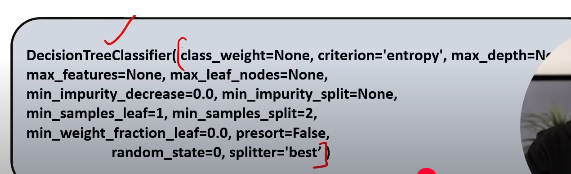
All this are Hyper paramatres that are used the tune the model

**Present Senario**
* We dont need to change all perticular hyper paramter now
* Their is a library in sklean which does it all

**Ways to tune HyoerParamatre**
* 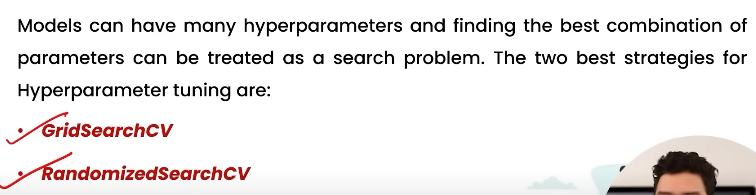

# GridSearchCV
* It makes the gird of parameters
* Say we need to make for two combination of hp
* Then GridSearchCV will create a matrix with al the available values of hp and check for accuracy will all the values
* And takes the max accuracy
* 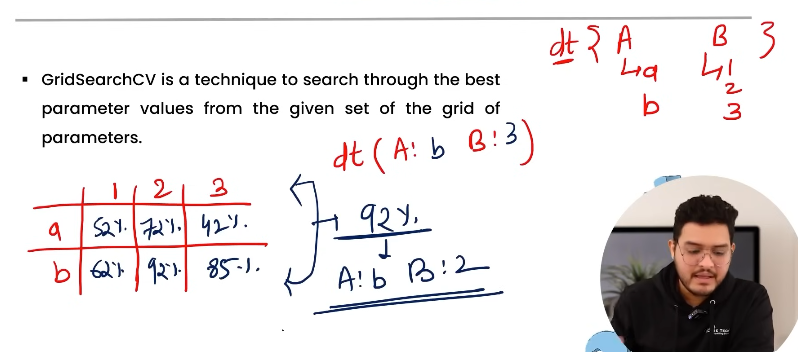
* * Where A and B are tow hp and a,b ,1,2,3 are the values we can put in the hp
* **Cons** - If we have many number of hp then it will be very slow

# Randomized SearchCV

* It only takes or works on number of hp which is given by user
* 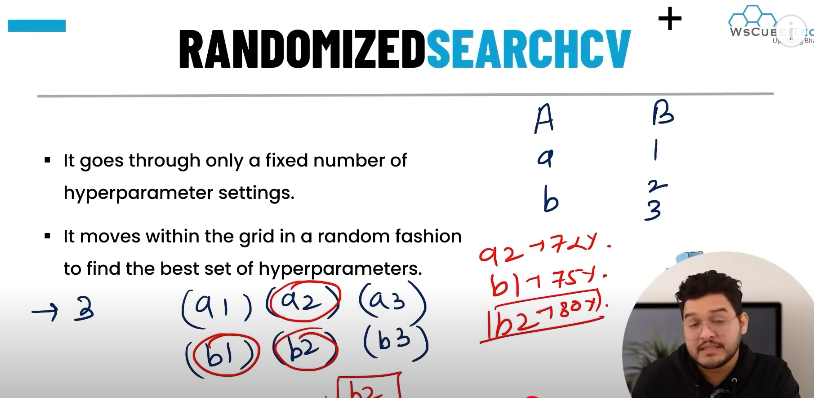
* i.e here is this case 3 has bee setted beforehand so it will randomly select 3 pairs and give the max accuracy out of it

* This is faster the GridSearchCV but this may miss best hp

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
data = pd.read_csv(r"D:\Data Science\Datasets\salary.csv")

In [56]:
data.head(3)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000


In [57]:
data.drop(columns='Position', inplace=True)

In [58]:
data.head(3)

,Level,Salary
0,1,45000
1,2,50000
2,3,60000


* First we we train any model and tune the HP to increse the accuracy

In [59]:
x = data.iloc[:,:-1]
y = data['Salary']

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train, x_test, y_train, y_test =train_test_split(x,y, train_size=0.8, random_state=42)

In [62]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [64]:
dt.score(x_test, y_test), dt.score(x_test, y_test)

(0.95375, 0.95375)

We got 85% but we need to train the HP

In [65]:
# To see the HP of DecisionTree 
DecisionTreeRegressor??

Init signature:
DecisionTreeRegressor(
    *,
    criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Source:        
class DecisionTreeRegressor(RegressorMixin, BaseDecisionTree):
    """A decision tree regressor.

    Read more in the :ref:`User Guide <tree>`.

    Parameters
    ----------
    criterion : {"squared_error", "friedman_mse", "absolute_error", \
            "poisson"}, default="squared_error"
        The function to measure the quality of a split. Supported criteria
        are "squared_error" for the mean squared error, which is equal to
        variance reduction as feature selection criterion and minimizes the L2
        loss using the mean of each terminal node, "friedman_mse", which uses
        mean squared error with Frie

So this are all the HP  
criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,
    monotonic_cst=None,

In [66]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [70]:
df = {'criterion' :["squared_error", "friedman_mse", "absolute_error","poisson"],
    'splitter' : ["best", "random"],
    'max_depth' : [i for i in range(2,20)]}

In [71]:
gd = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=df)
gd.fit(x_train, y_train)

C:\Users\Harsh Narayankar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Harsh Narayankar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Harsh Narayankar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Harsh Narayankar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'splitter': ['best', 'random']})

In [77]:
gd.best_params_

{'criterion': 'squared_error', 'max_depth': 2, 'splitter': 'best'}

In [83]:
dt1 = DecisionTreeRegressor(criterion='squared_error',max_depth= 12, splitter= 'best')
dt1.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=12)

In [84]:
dt1.score(x_train, y_train), dt1.score(x_test, y_test)

(1.0, 0.95375)